In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['figure.figsize'] = [10,8]
sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

In [46]:
# 한글이 꺠지는 경우 (안외워도 됨)
from matplotlib import font_manager, rc
import matplotlib
import platform

if platform.system() == 'Winodws':
  #윈도우인 인경우
  font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf')
  rc('font', family = font_name)

else:
  rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

In [47]:
# Loading 'Tips' datest from seaborn -> 시각화 라이브러리

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [48]:
tips.shape

(244, 7)

In [49]:
# matplotlib을 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
sum_tip_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [50]:
x_label = ['Thu','Fri','Sat','Sun']
x_label_index = np.arange(len(x_label))
x_label_index

array([0, 1, 2, 3])

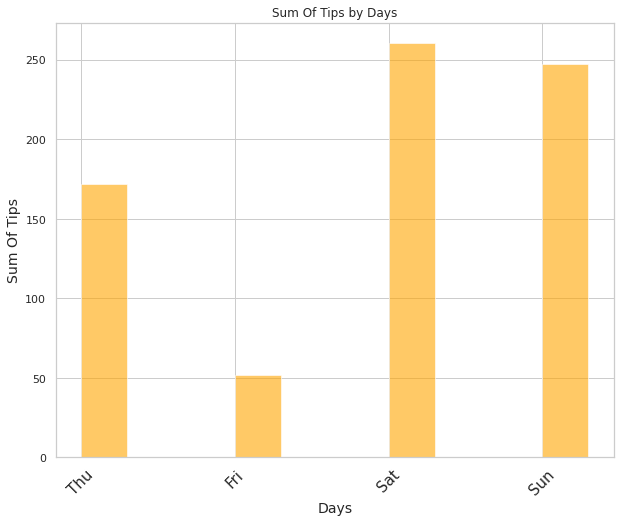

In [51]:
# Bar 차트 이해 및 제작 with matplotlib
plt.bar(x_label, sum_tip_by_day,
        color='orange', # 색 지정
        alpha=0.6, 
        width=0.3, 
        align='edge') # alpha = 투명도, width = 막대 넓이, aligh = 막대 배치
plt.title('Sum Of Tips by Days')        
plt.xlabel('Days', fontsize=14)
plt.ylabel('Sum Of Tips', fontsize=14)
plt.xticks(x_label_index,
           x_label,
           rotation=45,
           fontsize=15)
plt.show()

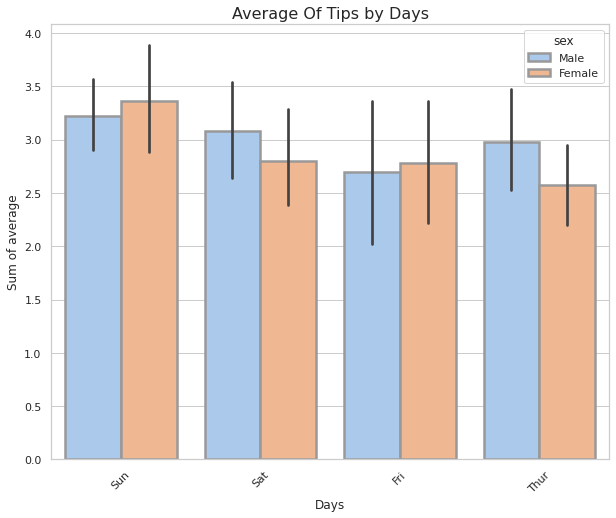

In [52]:
# seaborn을 활용한 시각화

sns.barplot(data=tips, # 데이터 프레임 명시
            x='day', # x 변수
            y='tip', # y 변수
            estimator=np.average,
            hue='sex',  # hue = 색깔구분을 통해 특정 컬럼값을 비교할 때
            order = ['Sun','Sat','Fri','Thur'], # x ticks 순서
            edgecolor = '.6', # 바 모서리 선명도
            linewidth=2.5) # 모서리 두께 
plt.title('Average Of Tips by Days', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum of average')
plt.xticks(rotation=45)
plt.show()

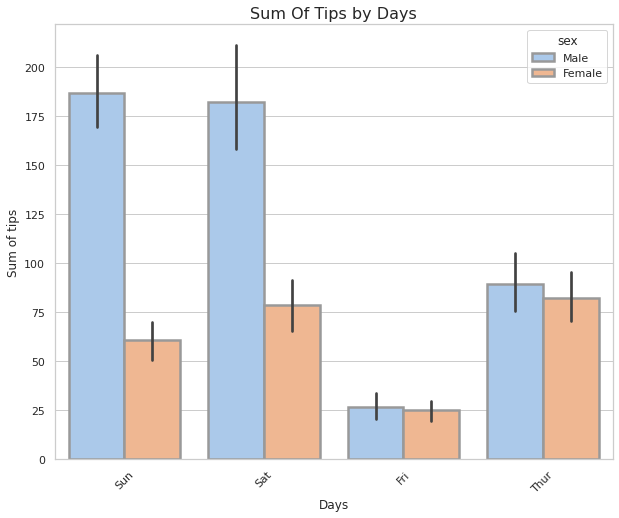

In [53]:
sns.barplot(data=tips, # 데이터 프레임 명시
            x='day', # x 변수
            y='tip', # y 변수
            estimator=np.sum,
            hue='sex',  # hue = 색깔구분을 통해 특정 컬럼값을 비교할 때
            order = ['Sun','Sat','Fri','Thur'], # x ticks 순서
            edgecolor = '.6', # 바 모서리 선명도
            linewidth=2.5) # 모서리 두께 
plt.title('Sum Of Tips by Days', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum of tips')
plt.xticks(rotation=45)
plt.show()

In [54]:
# pie 차트 이해 및 제작
# matplotlib을 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
ratio_tip_by_day = sum_tip_by_day/sum_tip_by_day.sum()
ratio_tip_by_day

day
Thur    0.234875
Fri     0.071024
Sat     0.355942
Sun     0.338159
Name: tip, dtype: float64

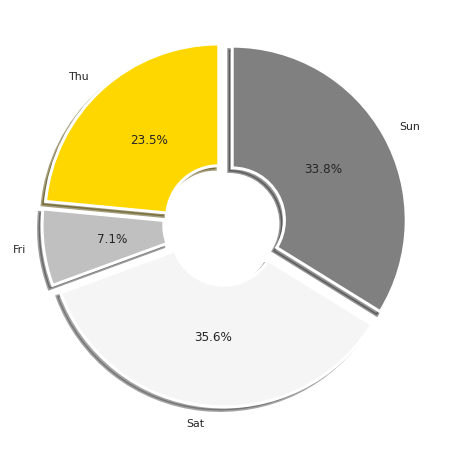

In [55]:
x_label = ['Thu','Fri','Sat','Sun']

plt.pie(ratio_tip_by_day, # 비율값
        labels=x_label, # 라벨값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식 표시
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=True, # True: 반시계, False: 시계
        explode=[0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도
        shadow=True, # 그림자 여부 표시
        colors=['gold','silver','whitesmoke','gray'], # 색깔코드로도 변환 가능
        wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':3}) # 도넛 차트를 그릴 때 사용하는 옵션
plt.show()

In [56]:
# Line 차트 이해 및 제작
# matplotlib을 활용해서 시각화
# line 차트 예제를 위해, tips 데이터에 가상 시간 컬럼 추가하기
# 일요일 데이터만 사용

sun_tips = tips[tips['day']== 'Sun']
sun_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [57]:
# 현재 서버 시간을 얻기 위해 datetime 라이브러리 사용

import datetime
date = []
today = datetime.date.today()
date.append(today)

for time in range(sun_tips.shape[0]-1):
  today += datetime.timedelta(1) # 하루씩 추가
  date.append(today)

date

[datetime.date(2021, 9, 20),
 datetime.date(2021, 9, 21),
 datetime.date(2021, 9, 22),
 datetime.date(2021, 9, 23),
 datetime.date(2021, 9, 24),
 datetime.date(2021, 9, 25),
 datetime.date(2021, 9, 26),
 datetime.date(2021, 9, 27),
 datetime.date(2021, 9, 28),
 datetime.date(2021, 9, 29),
 datetime.date(2021, 9, 30),
 datetime.date(2021, 10, 1),
 datetime.date(2021, 10, 2),
 datetime.date(2021, 10, 3),
 datetime.date(2021, 10, 4),
 datetime.date(2021, 10, 5),
 datetime.date(2021, 10, 6),
 datetime.date(2021, 10, 7),
 datetime.date(2021, 10, 8),
 datetime.date(2021, 10, 9),
 datetime.date(2021, 10, 10),
 datetime.date(2021, 10, 11),
 datetime.date(2021, 10, 12),
 datetime.date(2021, 10, 13),
 datetime.date(2021, 10, 14),
 datetime.date(2021, 10, 15),
 datetime.date(2021, 10, 16),
 datetime.date(2021, 10, 17),
 datetime.date(2021, 10, 18),
 datetime.date(2021, 10, 19),
 datetime.date(2021, 10, 20),
 datetime.date(2021, 10, 21),
 datetime.date(2021, 10, 22),
 datetime.date(2021, 10, 23),


In [58]:
sun_tips['date'] = date
sun_tips

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2021-09-20
1,10.34,1.66,Male,No,Sun,Dinner,3,2021-09-21
2,21.01,3.50,Male,No,Sun,Dinner,3,2021-09-22
3,23.68,3.31,Male,No,Sun,Dinner,2,2021-09-23
4,24.59,3.61,Female,No,Sun,Dinner,4,2021-09-24
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2021-11-30
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2021-12-01
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2021-12-02
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2021-12-03


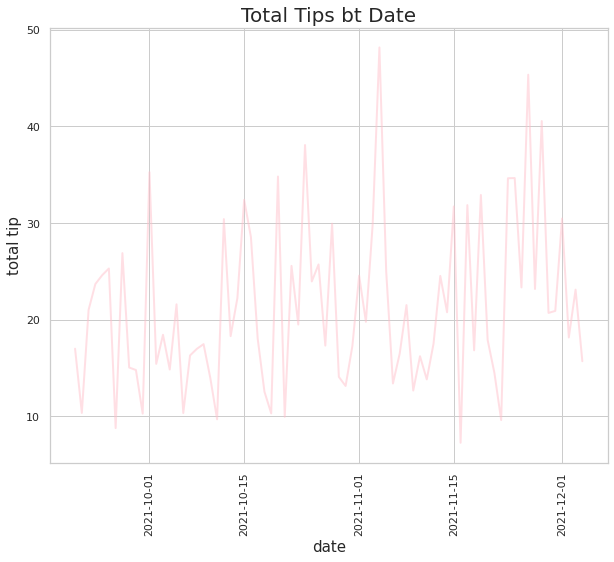

In [59]:
# line chart

plt.plot(sun_tips['date'], sun_tips['total_bill'],
         linestyle='-', # 라인 모양
         linewidth=2, # 라인두께
         color='pink', # 색깔
         alpha=0.5 # 투명도
         )
plt.title('Total Tips bt Date', fontsize=20)
plt.xlabel('date', fontsize=15)
plt.ylabel('total tip', fontsize=15)
plt.xticks(rotation=90)
plt.show()

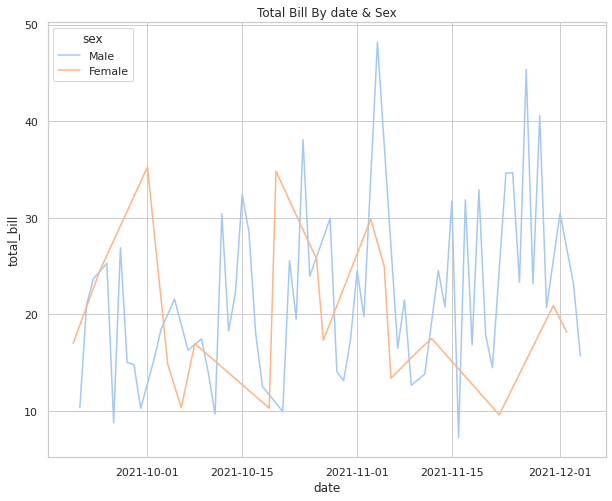

In [60]:
# seaborn을 활용한 시각화
sns.lineplot(data=sun_tips,
             x='date',
             y='total_bill',
             hue='sex')
plt.title('Total Bill By date & Sex')
plt.show()

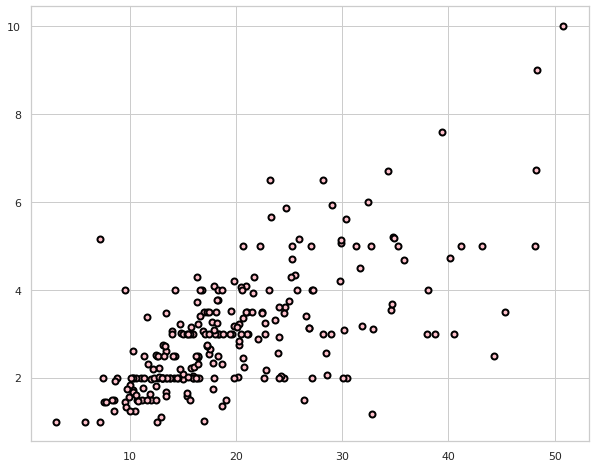

In [61]:
# Scatter 차트 이해 및 제작 
# matplotlib을 활용한 시각화

plt.scatter(tips['total_bill'], tips['tip'],
            color='pink', # 색상
            edgecolor='black', # 테두리 색깔
            linewidth=2) #라인 두께
plt.show()

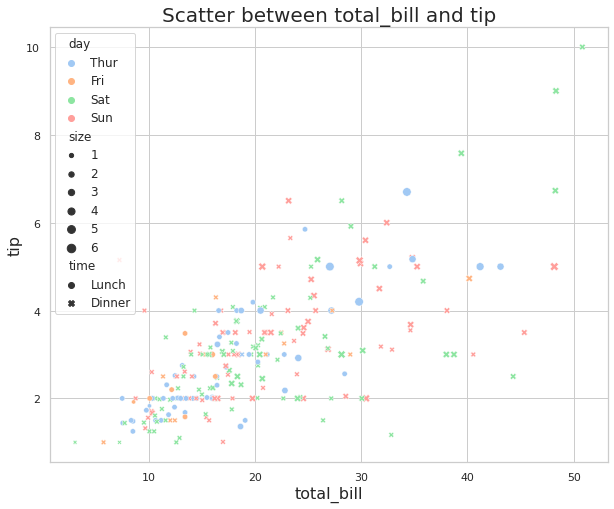

In [62]:
# seaborn을 활용한 시각화
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                style='time',# 모양(색깔)으로 다른 변수랑 구분 
                hue='day',  # 색깔로 다른 변수랑구분
                size ='size' # 크기 구분으로 다른 변수량 비교
                )
plt.title('Scatter between total_bill and tip', fontsize=20)
plt.xlabel('total_bill', fontsize=16)
plt.ylabel('tip', fontsize=16)
plt.show() 

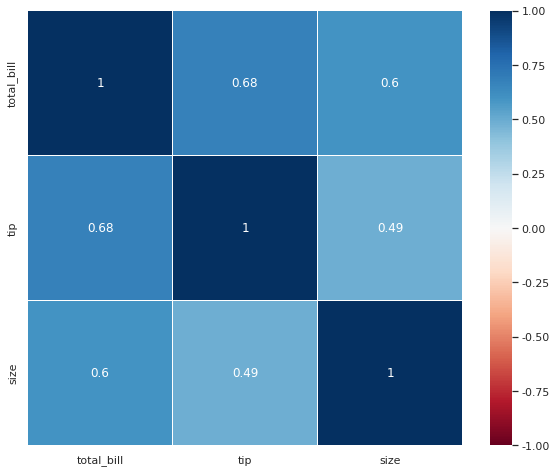

In [63]:
# Heat Map 차트 이해 및 제작

# seaborn 을 활용한 시각화
sns.heatmap(tips.corr(),
            annot=True, # 박스안 corr 값 표시할지 말지 
            square= True, # 박스를 정사각형으로 만들지 말지
            vmin=-1, vmax=1, # 최소 최댓값 지정
            linewidth=.5, # 라인 두께 지정
            cmap='RdBu' # 색상 선택
            )

plt.show()

In [64]:
tips.corr() # 연속형 변수에만 사용 가능

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


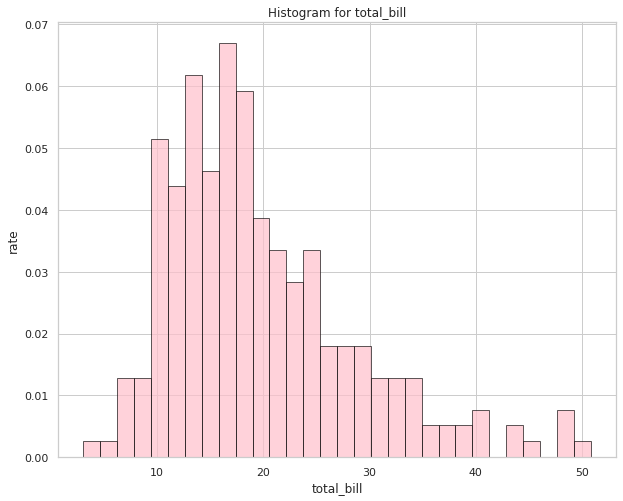

In [65]:
# Histogram 차트 이해 및 제작 -> 변수에 대한 분포를 알아볼때 쓰는 것
# matplotlib을 활용한 시각화

plt.hist(tips['total_bill'],
         bins=30,
         density=True,
         alpha=0.7,
         color='pink',
         edgecolor='black',
         linewidth=0.9)
plt.title('Histogram for total_bill')
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

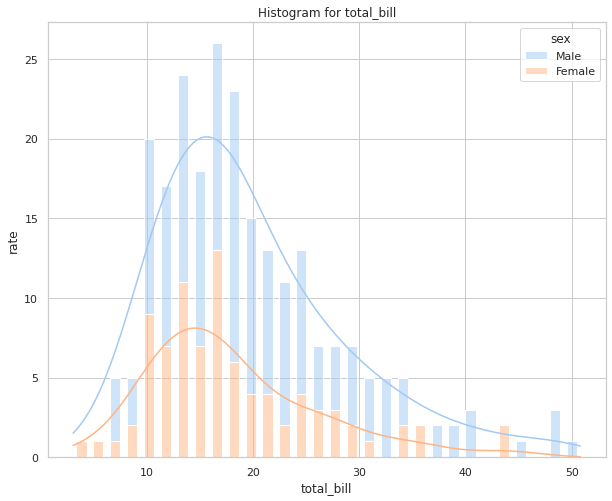

In [66]:
# seaborn을 활용한 시각화

sns.histplot(data=tips,
             x='total_bill',
             bins=30,
             kde=True,
             hue='sex',
             multiple='stack',
             shrink=0.6
             )
plt.title('Histogram for total_bill')
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

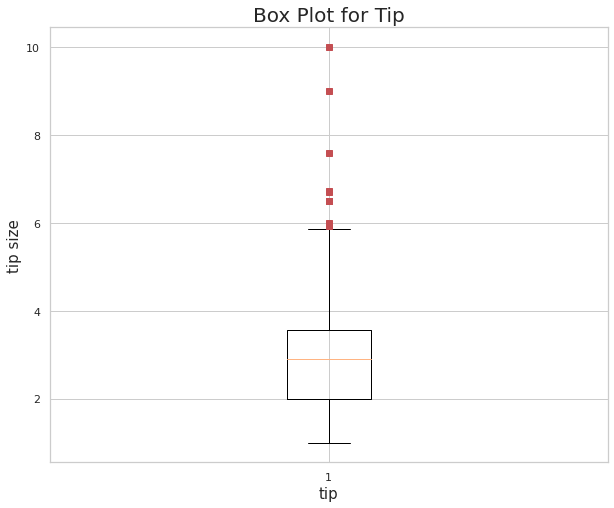

In [71]:
# Box 차트 이해 및 제작
# outliers = 이상치,박스 = median 값
# matplotlib을 활용한 시각화

plt.boxplot(tips['tip'],
            sym='rs')
plt.title('Box Plot for Tip', fontsize=20)
plt.ylabel('tip size', fontsize=15)
plt.xlabel('tip', fontsize=15)
plt.show()

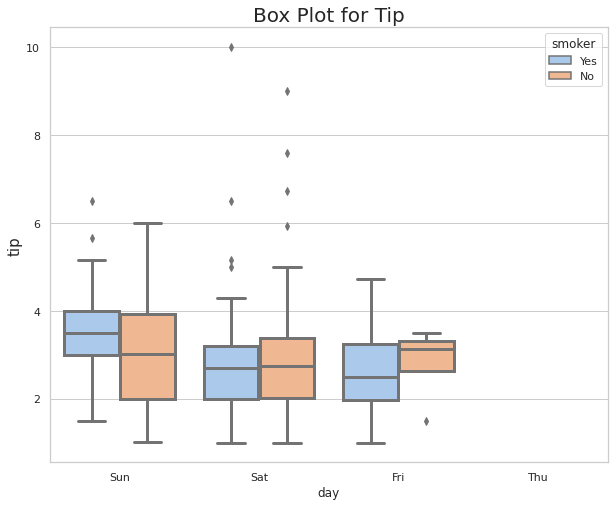

In [82]:
# seaborn을 활용한 시각화

sns.boxplot(data=tips,
            x='day',
            y='tip',
            hue='smoker',
            linewidth=3,
            order=['Sun','Sat','Fri','Thu'])
plt.title('Box Plot for Tip', fontsize=20)
plt.ylabel('tip', fontsize=15)
plt.show()

In [81]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
